In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
exams_data = pd.read_csv(r"C:\Users\Local User\Downloads\exams1.csv")

In [3]:
exams_data.sample(10)

,gender,race/ethnicity,parental_level_of _education,lunch,test_preparation_course,math_score,reading_score,writing_score
824,male,group C,high school,standard,completed,79,79,70
490,male,group D,master's degree,standard,none,85,69,74
496,female,group B,some high school,free/reduced,none,26,34,28
481,female,group C,bachelor's degree,free/reduced,none,77,79,83
665,female,group D,some high school,standard,none,64,70,73
907,male,group C,high school,standard,none,66,67,64
999,male,group A,some college,standard,completed,65,60,62
160,female,group D,associate's degree,standard,completed,84,98,97
788,male,group D,high school,standard,none,61,62,60
913,female,group C,some college,standard,completed,59,68,67


In [4]:
print(pd.isnull(exams_data).sum())

gender                          0
race/ethnicity                  0
parental_level_of _education    0
lunch                           0
test_preparation_course         0
math_score                      0
reading_score                   0
writing_score                   0
dtype: int64


In [5]:
exams_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   gender                        1000 non-null   object
 1   race/ethnicity                1000 non-null   object
 2   parental_level_of _education  1000 non-null   object
 3   lunch                         1000 non-null   object
 4   test_preparation_course       1000 non-null   object
 5   math_score                    1000 non-null   int64 
 6   reading_score                 1000 non-null   int64 
 7   writing_score                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
for col in exams_data.columns:
    if exams_data[col].dtype == "object":
        print("Current Column: {}".format(col))
        print(exams_data[col].value_counts())
        print("=" * 10)


Current Column: gender
male      517
female    483
Name: gender, dtype: int64
Current Column: race/ethnicity
group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64
Current Column: parental_level_of _education
some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_level_of _education, dtype: int64
Current Column: lunch
standard        652
free/reduced    348
Name: lunch, dtype: int64
Current Column: test_preparation_course
none         665
completed    335
Name: test_preparation_course, dtype: int64


In [ ]:
 Passing_mark = 50
exams_data["Total_score"] = round((exams_data["math score"] + exams_data["reading score"] + exams_data["writing score"]) /3 , 2)

["Did_pass"] = False
exams_data["Did_pass"] = exams_data["Total_score"] > Passing_mark

In [ ]:
print(get_passed("gender","male", exams_data ))


In [7]:
exams_data.lunch.value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [ ]:
exams_data.info()

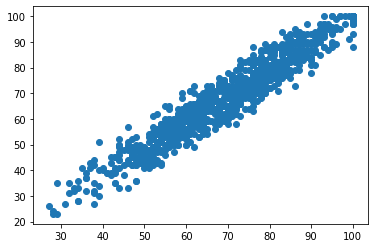

In [8]:
plt.scatter(exams_data['reading_score'],exams_data['writing_score'])
plt.show()

In [9]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
feature_columns = ['math_score','reading_score']
X = exams_data[feature_columns].values
y = exams_data['writing_score'].values


In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)


In [12]:
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


[Text(0.6044904629950807, 0.975, 'X[1] <= 76.5\ngini = 0.981\nsamples = 630\nvalue = [2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3\n4, 5, 6, 4, 8, 6, 4, 9, 10, 11, 6, 6, 6, 13\n11, 7, 13, 13, 11, 15, 15, 13, 18, 16, 20, 21\n22, 9, 15, 12, 19, 17, 15, 20, 9, 12, 11, 8, 9\n8, 12, 8, 15, 13, 9, 6, 11, 9, 8, 10, 7, 4\n4, 7, 3, 5, 2, 4, 1, 11]'),
 Text(0.29828958674949546, 0.925, 'X[1] <= 60.5\ngini = 0.972\nsamples = 443\nvalue = [2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3\n4, 5, 6, 4, 8, 6, 4, 9, 10, 11, 6, 6, 6, 13\n11, 7, 13, 13, 11, 15, 15, 13, 18, 16, 20, 21\n22, 8, 15, 11, 17, 14, 11, 16, 6, 8, 5, 3, 1\n2, 2, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.13398713420787084, 0.875, 'X[1] <= 53.5\ngini = 0.964\nsamples = 178\nvalue = [2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3\n4, 5, 6, 4, 8, 6, 4, 9, 10, 10, 6, 5, 6, 11\n8, 5, 11, 6, 6, 4, 4, 1, 6, 3, 3, 2, 0, 0\n0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.072

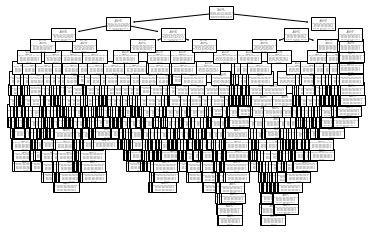

In [13]:
exams_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
exams_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(exams_clf)

In [14]:
print('Accuracy score is:',cross_val_score(exams_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.08095238095238096


C:\Users\Local User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [15]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = exams_clf.predict(Xcv)


In [16]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.05714285714285714


array([[[69,  0],
        [ 1,  0]],

       [[69,  0],
        [ 1,  0]],

       [[69,  1],
        [ 0,  0]],

       [[69,  1],
        [ 0,  0]],

       [[68,  1],
        [ 1,  0]],

       [[67,  2],
        [ 1,  0]],

       [[68,  1],
        [ 1,  0]],

       [[67,  2],
        [ 1,  0]],

       [[68,  0],
        [ 2,  0]],

       [[68,  0],
        [ 2,  0]],

       [[66,  3],
        [ 1,  0]],

       [[68,  1],
        [ 1,  0]],

       [[65,  4],
        [ 1,  0]],

       [[67,  0],
        [ 3,  0]],

       [[69,  1],
        [ 0,  0]],

       [[67,  1],
        [ 2,  0]],

       [[67,  2],
        [ 1,  0]],

       [[69,  0],
        [ 1,  0]],

       [[68,  1],
        [ 1,  0]],

       [[66,  1],
        [ 3,  0]],

       [[68,  1],
        [ 1,  0]],

       [[67,  1],
        [ 0,  2]],

       [[68,  2],
        [ 0,  0]],

       [[66,  2],
        [ 2,  0]],

       [[69,  0],
        [ 1,  0]],

       [[65,  3],
        [ 2,  0]],

       [[66,

In [17]:
YT_hat = exams_clf.predict(Xtest)
YT_hat

array([ 77,  83,  47,  87,  70,  69,  91,  82,  86,  69,  63,  60,  60,
        64,  36,  24,  82,  82,  86,  78,  55,  71,  75,  96,  66,  86,
        72,  86,  71,  63,  80,  76,  43,  81,  76,  61,  71,  87,  59,
        44,  53,  91,  36,  55,  40,  70,  67,  62,  73,  70,  58,  48,
        57,  67,  56,  82,  73,  87,  59,  79,  48,  53,  90,  64,  96,
        84,  88,  59,  61,  54,  35,  81,  77,  64,  63,  66,  98,  88,
        66,  61,  56,  56,  86,  44,  77,  43,  73,  79,  55,  59,  82,
        50,  73,  70,  78,  74,  65,  47,  80,  95,  93,  44,  33,  77,
        86,  47,  72,  88,  89,  66,  63,  65,  75, 100,  72,  79,  82,
        47,  78,  59,  45,  86,  55,  70, 100,  42,  71,  77,  71,  86,
        85,  70,  65,  72,  71,  50,  63,  56,  48,  62,  86,  67,  91,
       100,  45,  64,  47,  41,  71,  71,  65, 100,  57,  82,  71,  46,
        72,  70,  68,  73,  56,  82,  39,  74,  76,  49,  54,  23,  60,
        61,  45,  45,  89,  56,  57,  86,  63,  79,  93,  68,  5

In [18]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 7.333333333333333 %


array([[[299,   1],
        [  0,   0]],

       [[299,   1],
        [  0,   0]],

       [[299,   0],
        [  1,   0]],

       [[298,   1],
        [  1,   0]],

       [[299,   0],
        [  1,   0]],

       [[298,   2],
        [  0,   0]],

       [[299,   0],
        [  1,   0]],

       [[297,   2],
        [  1,   0]],

       [[297,   1],
        [  2,   0]],

       [[297,   2],
        [  1,   0]],

       [[297,   1],
        [  1,   1]],

       [[295,   4],
        [  1,   0]],

       [[297,   1],
        [  2,   0]],

       [[296,   1],
        [  3,   0]],

       [[292,   1],
        [  6,   1]],

       [[295,   3],
        [  2,   0]],

       [[292,   4],
        [  3,   1]],

       [[298,   1],
        [  1,   0]],

       [[290,   6],
        [  4,   0]],

       [[292,   4],
        [  3,   1]],

       [[293,   4],
        [  3,   0]],

       [[291,   2],
        [  7,   0]],

       [[295,   0],
        [  5,   0]],

       [[298,   1],
        [  1, 

In [19]:
exams_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
exams_Fclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

[Text(0.5956107190860215, 0.9722222222222222, 'X[1] <= 75.5\ngini = 0.981\nsamples = 700\nvalue = [2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3\n4, 5, 6, 4, 9, 6, 4, 9, 11, 12, 7, 6, 6, 15\n13, 8, 14, 14, 14, 15, 17, 14, 19, 17, 23, 22\n24, 9, 17, 13, 21, 19, 18, 21, 12, 13, 12, 11\n12, 9, 13, 9, 16, 13, 11, 8, 12, 11, 8, 13, 7\n4, 5, 7, 3, 5, 2, 6, 1, 2, 13]'),
 Text(0.2847521841397849, 0.9166666666666666, 'X[1] <= 60.5\ngini = 0.972\nsamples = 466\nvalue = [2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3\n4, 5, 6, 4, 9, 6, 4, 9, 11, 12, 7, 6, 6, 15\n13, 8, 14, 14, 14, 15, 17, 14, 19, 16, 23, 21\n24, 7, 17, 12, 17, 15, 11, 15, 8, 8, 5, 2, 1\n2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.12238575268817205, 0.8611111111111112, 'X[1] <= 53.5\ngini = 0.964\nsamples = 191\nvalue = [2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3\n4, 5, 6, 4, 9, 6, 4, 9, 11, 11, 7, 5, 6, 13\n10, 6, 11, 6, 6, 4, 6, 1, 6, 3, 3, 2, 0, 0\n0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 

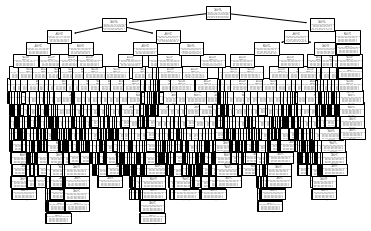

In [20]:
tree.plot_tree(exams_Fclf)

In [21]:
YT_Fhat = exams_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 7.000000000000001 %


array([[[299,   1],
        [  0,   0]],

       [[299,   1],
        [  0,   0]],

       [[299,   0],
        [  1,   0]],

       [[297,   2],
        [  1,   0]],

       [[299,   0],
        [  1,   0]],

       [[299,   0],
        [  1,   0]],

       [[297,   2],
        [  1,   0]],

       [[297,   1],
        [  1,   1]],

       [[294,   5],
        [  1,   0]],

       [[299,   1],
        [  0,   0]],

       [[297,   1],
        [  2,   0]],

       [[295,   4],
        [  1,   0]],

       [[296,   2],
        [  2,   0]],

       [[296,   1],
        [  3,   0]],

       [[293,   0],
        [  6,   1]],

       [[296,   2],
        [  2,   0]],

       [[292,   4],
        [  3,   1]],

       [[297,   2],
        [  1,   0]],

       [[290,   6],
        [  4,   0]],

       [[293,   3],
        [  4,   0]],

       [[295,   2],
        [  3,   0]],

       [[291,   2],
        [  7,   0]],

       [[293,   2],
        [  5,   0]],

       [[298,   1],
        [  1, 